## 파이토치(PyTorch)
- 코드 출처 : https://pytorch.org/tutorials/

### 파이토치의 구성 요소
- torch : 텐서를 생성하는 라이브러리
- torch.autograd : 자동 미분 기능을 제공하는 라이브러리
- torch.nn : 신경망을 생성하는 라이브러리
- torch.multiprocessing : 병렬처리 기능을 제공하는 라이브러리
- torch.utils : 데이터 조작 등 유틸리티 기능 제공
- torch.legacy(./nn/.optim) : Torch로부터 포팅해온 코드
- torch.onnx : ONNX(Open Neural Network Exchange)
    - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

### 텐서(Tensors)
- 넘파이(Numpy)의 ndarray와 유사
- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [3]:
torch.__version__

'1.7.0'

### 초기화 되지 않은 행렬

In [5]:
x = torch.empty(4,2)
print(x)

tensor([[9.6928e+16, 4.5831e-41],
        [9.6094e+16, 4.5831e-41],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


### 무작위로 초기화된 행렬

In [8]:
x = torch.rand(4,2)
print(x)

tensor([[0.9514, 0.4839],
        [0.8783, 0.1085],
        [0.6706, 0.3788],
        [0.0761, 0.2097]])


### dtype이 long, 0으로 채워진 텐서

In [9]:
x = torch.zeros(4,2,dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [10]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [11]:
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [12]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 0.0071, -0.0937,  0.4996, -0.7206],
        [-1.1112,  0.7797,  2.2502, -0.1907]])


### 텐서의 크기

In [13]:
print(x.size())

torch.Size([2, 4])


### 텐서의 연산(operations)

### 덧셈

In [14]:
print(x)

tensor([[ 0.0071, -0.0937,  0.4996, -0.7206],
        [-1.1112,  0.7797,  2.2502, -0.1907]])


In [17]:
y = torch.rand(2,4)
print(y)
print(x+y)

tensor([[0.0793, 0.3882, 0.7453, 0.5012],
        [0.8574, 0.5236, 0.7108, 0.1687]])
tensor([[ 0.0864,  0.2945,  1.2449, -0.2194],
        [-0.2538,  1.3033,  2.9610, -0.0220]])


In [18]:
print(torch.add(x,y))

tensor([[ 0.0864,  0.2945,  1.2449, -0.2194],
        [-0.2538,  1.3033,  2.9610, -0.0220]])


In [19]:
result = torch.empty(2,4)
torch.add(x,y,out=result)
print(result)

tensor([[ 0.0864,  0.2945,  1.2449, -0.2194],
        [-0.2538,  1.3033,  2.9610, -0.0220]])


In [25]:
print(x)
print(y)
y.add_(x) # y+=x
print(y)

tensor([[ 0.0071, -0.0937,  0.4996, -0.7206],
        [-1.1112,  0.7797,  2.2502, -0.1907]])
tensor([[ 0.1075,  0.0134,  2.7438, -2.3811],
        [-3.5874,  3.6424,  9.7117, -0.5941]])
tensor([[ 0.1146, -0.0803,  3.2434, -3.1017],
        [-4.6986,  4.4221, 11.9620, -0.7848]])


### 뺄셈

In [26]:
x = torch.Tensor([[1,3],
                 [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x - y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


### 곱셈

In [27]:
x = torch.Tensor([[1,3],
                 [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x * y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


### 나눗셈

In [28]:
x = torch.Tensor([[1,3],
                 [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x/ y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


### dot 연산

In [29]:
x = torch.Tensor([[1,3],
                 [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(torch.mm(x,y))
#행렬곱

tensor([[20., 28.],
        [52., 76.]])


### 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용 가능

In [30]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [31]:
print(x[:,1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [39]:
x = torch.randn(4,5)
y = x.view(20)
z = x.view(5,-1)
print(x)
print(x.size())
print('-'*30)
print(y)
print(y.size())
print('-'*30)
print(z)
print(z.size())

tensor([[ 1.1284, -0.5241, -0.1175,  0.4338, -1.0532],
        [ 0.4988,  0.6994,  0.4140,  0.1769, -1.7826],
        [-0.7610,  0.4686, -0.8459,  1.3099,  1.2445],
        [-0.7386,  0.4788, -1.5141, -1.1108, -0.1658]])
torch.Size([4, 5])
------------------------------
tensor([ 1.1284, -0.5241, -0.1175,  0.4338, -1.0532,  0.4988,  0.6994,  0.4140,
         0.1769, -1.7826, -0.7610,  0.4686, -0.8459,  1.3099,  1.2445, -0.7386,
         0.4788, -1.5141, -1.1108, -0.1658])
torch.Size([20])
------------------------------
tensor([[ 1.1284, -0.5241, -0.1175,  0.4338],
        [-1.0532,  0.4988,  0.6994,  0.4140],
        [ 0.1769, -1.7826, -0.7610,  0.4686],
        [-0.8459,  1.3099,  1.2445, -0.7386],
        [ 0.4788, -1.5141, -1.1108, -0.1658]])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [41]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.4178])
-1.4177613258361816
torch.float32


- 스칼라값 하나만 존재해야합

In [43]:
x = torch.randn(2) #only one element
print(x)
print(x.item())
print(x.dtype)

tensor([-1.6971, -1.4061])


ValueError: only one element tensors can be converted to Python scalars

### squeez
- 차원을 축소

In [46]:
tensor = torch.rand(1,3,3)
print(tensor)
tensor.shape

tensor([[[0.7596, 0.4209, 0.9759],
         [0.5546, 0.8425, 0.2941],
         [0.0380, 0.3146, 0.1152]]])


torch.Size([1, 3, 3])

In [47]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.7596, 0.4209, 0.9759],
        [0.5546, 0.8425, 0.2941],
        [0.0380, 0.3146, 0.1152]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [48]:
tensor = torch.rand(1,3,3)
print(tensor)
tensor.shape

tensor([[[0.9203, 0.6863, 0.8793],
         [0.4549, 0.7814, 0.3025],
         [0.2959, 0.8701, 0.3776]]])


torch.Size([1, 3, 3])

In [54]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.9203, 0.6863, 0.8793],
          [0.4549, 0.7814, 0.3025],
          [0.2959, 0.8701, 0.3776]]]])
torch.Size([1, 1, 3, 3])


### stack
-텐서간 결합

In [57]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서들 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
    - 예를들어 해당 차원을 늘려준 후 결합

In [62]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)

c = torch.cat((a,b),dim=0)

print(c)
print(c.size())

tensor([[[[-0.0258,  0.2413,  0.0436],
          [-1.8215, -1.5626,  0.1262],
          [ 0.6865,  0.6094,  0.1325]]],


        [[[-0.5231,  0.7969,  0.5752],
          [-0.4449, -1.1408,  0.7321],
          [-1.9489, -0.6903, -0.0968]]]])
torch.Size([2, 1, 3, 3])


In [63]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)

c = torch.cat((a,b),dim=0)

print(c)
print(c.size())

tensor([[[ 0.8580, -0.3079,  0.4898],
         [-0.0914, -1.1819, -0.1145],
         [ 0.0660,  0.3166,  1.7925]],

        [[-0.2714, -0.8575, -0.9471],
         [ 0.6291,  0.1351, -0.8697],
         [ 0.9377,  0.6172,  0.2169]]])
torch.Size([2, 3, 3])


In [64]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)

c = torch.cat((a,b),dim=1)

print(c)
print(c.size())

tensor([[[ 0.4130,  1.2538,  0.9535],
         [-0.6587, -0.7542,  1.0087],
         [ 2.9472,  0.2344, -0.3197],
         [ 1.2219, -0.0900,  0.3925],
         [ 1.6753,  0.6767,  0.0171],
         [-0.3969,  0.9053,  1.2831]]])
torch.Size([1, 6, 3])


In [65]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)

c = torch.cat((a,b),dim=2)

print(c)
print(c.size())

tensor([[[-0.2827, -1.8941,  0.6851,  1.1094,  0.2734, -1.7775],
         [-0.1275,  0.3890,  1.1529, -1.9799, -0.7360, -0.7676],
         [ 1.4209,  0.3252,  1.3687, -0.0065,  0.7489,  0.0658]]])
torch.Size([1, 3, 6])


### chunk
- 텐서를 여러 개로 나눌 때 사용
- 몇 개의 텐서로 나눌 것이냐

In [69]:
tensor = torch.rand(3,6)
t1,t2,t3 = torch.chunk(tensor,3,dim=1) #가운데 3의 의미는 3개의 텐서로 나누는 의미

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.6186, 0.2993, 0.6407, 0.9264, 0.0302, 0.3762],
        [0.8448, 0.9685, 0.9234, 0.5026, 0.6307, 0.7754],
        [0.3982, 0.9063, 0.5199, 0.9956, 0.1757, 0.4801]])
tensor([[0.6186, 0.2993],
        [0.8448, 0.9685],
        [0.3982, 0.9063]])
tensor([[0.6407, 0.9264],
        [0.9234, 0.5026],
        [0.5199, 0.9956]])
tensor([[0.0302, 0.3762],
        [0.6307, 0.7754],
        [0.1757, 0.4801]])


### split
- chunk와 동일한 기능이지만 조금 다름
- 하나의 텐서당 크기가 얼마이냐

In [70]:
tensor = torch.rand(3,6)
t1,t2 = torch.split(tensor,3,dim=1) #가운데 3의 의미는 나뉘어지는 하나의 텐서의 사이즈가 3으로

print(tensor)
print(t1)
print(t2)

tensor([[0.2303, 0.5438, 0.3819, 0.8800, 0.4684, 0.3859],
        [0.6558, 0.4083, 0.4016, 0.4859, 0.4613, 0.2415],
        [0.6207, 0.4547, 0.7858, 0.9664, 0.8798, 0.8942]])
tensor([[0.2303, 0.5438, 0.3819],
        [0.6558, 0.4083, 0.4016],
        [0.6207, 0.4547, 0.7858]])
tensor([[0.8800, 0.4684, 0.3859],
        [0.4859, 0.4613, 0.2415],
        [0.9664, 0.8798, 0.8942]])


### torch $\leftrightarrow$ numpy
 - torch Tensor(텐서)를 Numpy array(배열)로 변환 가능
     - numpy()
     - from_numpy()
 - (참고)
     - Tensor가 CPU산에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [81]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [82]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [83]:
print(a.add_(1))
print(b) #동일한 메모리 차지 텐서 계산하면 넘파이도 변경된다

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [85]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


### CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
    - 예) cpu,gpu

In [86]:
x = torch.rand(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.8328])
0.832764208316803
torch.float32


In [88]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x+y
print(device)
print(z)
print(z.to('cpu',torch.double))

cpu
tensor([1.8328])
tensor([1.8328], dtype=torch.float64)


### AUTIGRAD(자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop를 위한 미분값을 자동으로 계산

### Tensor
- data : tensor 형태의 데이터
- grad : data가 거쳐온 layer에 대한 미분값 저장
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)
- requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작
- 계산이 완료된 후 .backward()를 호출하면 자동으로 gradient를 계산할 수 있으며, .grad 속성에 누적됨
- 기록을 추적하는 것을 중단하게 하려면, detach()를 호출하여 연산기록으로부터 분리
- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad():로 감싸면 gradient는 필요없지만, requires_grad=True로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용
- Autograd 구현에서 매우 중요한 클래스 : Function 클래스

In [89]:
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [90]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [91]:
print(y.grad_fn)

In [92]:
z = y*y*2
out = z.mean()

print(z,out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- requires_grad_(...)는 기존 텐서의 requires_grad값을 바꿔치기(in-place)하여 변경

In [94]:
a = torch.rand(3,3)
a = ((a*3)/(a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파 : .backward()를 통해 역전파 계산 가능

In [95]:
out.backward()

In [96]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [98]:
x = torch.randn(3, requires_grad=True)

y = x*2
while y.data.norm() < 1000:
    y = y*2
print(y)

tensor([-640.6983,  714.8936,  756.7545], grad_fn=<MulBackward0>)


In [99]:
v = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


- with torch.no_grad()를 허용하여 gradient의 업데이트를 하지 않음

In [100]:
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


- detach() : 내용물은 같지만 requires_grad가 다른 새로운 텐서를 가져올 때

In [101]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름
a $\rightarrow$ b n$\rightarrow$ $\rightarrow$ c $\rightarrow$ out

$$\frac{\sigma out}{\sigma a} = ?$$

- backward()를 통해
a $\leftarrow$ b n$\leftarrow$ $\leftarrow$ c $\leftarrow$ out 을 계산하면

$\frac{\sigma out}{\sigma a} = ?$ 값이 a.grad에 채워짐

In [114]:
a = torch.ones(2,2,)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [115]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [117]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [118]:
b = a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [119]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [120]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [121]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 grad_fn이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [122]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [124]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


/Users/psh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [125]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


/Users/psh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [126]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


/Users/psh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


### 자동 미분 흐름 다시 보기(2)
- grad값을 넣어서 backward
- 아래의 코드에서 .grad값이 None은 gradient값이 필요하지 않기 때문

In [127]:
x = torch.ones(3,requires_grad=True)
y = (x**2)
z = y**2+x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [128]:
grad = torch.Tensor([0.1,1,100])
z.backward(grad)

In [129]:
print(x.data)
print(x.grad)
print(x.grad_fn)

tensor([1., 1., 1.])
tensor([  0.5000,   5.0000, 500.0000])
None


In [130]:
print(y.data)
print(y.grad)
print(y.grad_fn)

tensor([1., 1., 1.])
None


/Users/psh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [131]:
print(z.data)
print(z.grad)
print(z.grad_fn)

tensor([2., 2., 2.])
None


/Users/psh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


### nn & nn.functional
- 두 패키지가 같은 기능이지만 방식이 조금 다름
- 위의 autograd 관련 작업들을 두 패키지를 통해 진행할 수 있음
- 텐서를 직접 다룰 때 requires_grad와 같은 방식으로 진행할 수 있음
- 결론적으로, torch.nn은 attribute를 활용해 state를 저장하고 활용하고, torch.nn.functional로 구현한 함수의 경우에는 인스턴트화 시킬 필요 없이 사용이 가능

### nn 패키지
- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때
    - 따라서, weight 값들을 직접 선언 안함
- 예시
    - Containers
    - Convolution Layers
    - Pooling Layers
    - Padding Layers
    - Non-linear Activation(weigth sum, nonlinearity)
    - Non-linear Activation(other)
    - Normalization Layers
    - Recurrent Layers
    - Transformer Layers
    - Linear Layers
    - Dropout Layers
    - Sparse Layers
    - Distance Function
    - Loss Function
    - ..
- https://pytorch.org/docs/stable/nn

In [132]:
import torch.nn as nn

- Convolution Layer 예시(1)

In [135]:
m = nn.Conv2d(16,33,3,stride=2)

m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))

m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2), dilation=(3,1))

input = torch.rand(20,16,50,100)
print(input)
output = m(input)
print(output)

tensor([[[[3.7906e-01, 9.9525e-01, 1.9568e-01,  ..., 3.9829e-01,
           2.4994e-01, 1.4174e-02],
          [6.5143e-01, 9.4347e-01, 6.2784e-01,  ..., 2.3321e-01,
           7.2423e-01, 8.0199e-01],
          [7.1425e-01, 8.3368e-01, 2.9249e-01,  ..., 5.3348e-01,
           8.2284e-01, 3.7016e-01],
          ...,
          [5.6017e-02, 1.6813e-01, 9.7666e-03,  ..., 7.3853e-02,
           2.2486e-01, 1.3238e-01],
          [5.6317e-01, 5.6670e-01, 5.0312e-01,  ..., 2.7604e-01,
           7.9872e-01, 6.4918e-01],
          [2.8630e-01, 2.0067e-01, 1.4384e-01,  ..., 7.6706e-01,
           9.9230e-01, 9.0663e-03]],

         [[3.7502e-01, 6.5827e-01, 3.3712e-01,  ..., 3.1638e-01,
           2.8253e-01, 7.0979e-01],
          [4.2055e-01, 7.7894e-02, 2.6139e-01,  ..., 3.1720e-01,
           7.2675e-01, 8.0966e-02],
          [6.7552e-02, 3.5239e-01, 7.8460e-01,  ..., 1.2997e-01,
           9.0277e-02, 9.5489e-03],
          ...,
          [9.4889e-01, 6.3711e-01, 5.6792e-01,  ..., 1.7748

In [136]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지
- 가중치를 직접 선언하여 인자로 넣어줘야함
- 예시) 
    - Convolution Functions
    - Pooling Functions
    - Non-linear activation Functions
    - Normalization Functions
    - Linear Functions
    - Dropout Functions
    - Sparse Functions
    - Distance Functions
    - Loss Functions
    - ..
 - https://pytorch.org/docs/stable/nn.functional

In [137]:
import torch.nn.functional as F

- Convolutiob Layer 예시 (2)

In [138]:
filters = torch.randn(8,4,3,3)

In [139]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

### Torchvision
- transforms : 전처리할 때 사용하는 메소드
- transforms에서 제공하는 클래스 이외에 일반적으로 클래스를 따로 만들어 전처리 단계를 진행
    - 아래의 코드에서 다양한 전처리 기술 확인
    - https://pytorch.org/docs/stable/torchvision/transforms

In [142]:
!pip install torchvision

     |████████████████████████████████| 1.0MB 2.0MB/s eta 0:00:01


In [143]:
import torchvision
import torchvision.transforms as transforms

- 예시)
    - DataLoader의 인자로 들어갈 transform을 미리 정의할 수 있음
    - Compose를 통해 리스트 안에 순서대로 전처리 진행
    - 대표적인 예로, ToTensor()를 하는 이유는
    - torchvision이 PIL Image형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환해야함

In [145]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean=(0.5,),std=(0.5,))])

### utils.data
- Dataset에는 다양한 데이터셋이 존재
    - MNIST, CIFAR10 ...
- DataLoader, Dataset을 통해 batch_size, train여부, transform등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [147]:
from torch.utils.data import Dataset, DataLoader

In [150]:
trainset = torchvision.datasets.MNIST(root = './content/',
                                     train=True,
                                     download=True,
                                     transform=transform)

testset = torchvision.datasets.MNIST(root = './content/',
                                     train=False,
                                     download=True,
                                     transform=transform)

Extracting ./content/MNIST/raw/train-images-idx3-ubyte.gz to ./content/MNIST/raw


Extracting ./content/MNIST/raw/train-labels-idx1-ubyte.gz to ./content/MNIST/raw


Extracting ./content/MNIST/raw/t10k-images-idx3-ubyte.gz to ./content/MNIST/raw




Extracting ./content/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./content/MNIST/raw
Processing...
Done!


/Users/psh/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [151]:
train_loader = DataLoader(trainset, batch_size=8,shuffle=True,num_workers=2)
test_loader = DataLoader(testset, batch_size=8,shuffle=False,num_workers=2)

- batch_size만큼 데이터를 하나씩 가져옴

In [153]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape #torch size의 1이 채널값

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

### **(중요) torch에서는 channel(채널)이 앞에 옴**
- channel first
- tensorflow, keras등에서는 channel이 뒤에 옴

### 데이터 확인

In [154]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [155]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [156]:
image = torch_image.numpy()
image.shape

(28, 28)

In [161]:
label = labels[0].numpy()
label.shape

()

In [162]:
label

array(7)

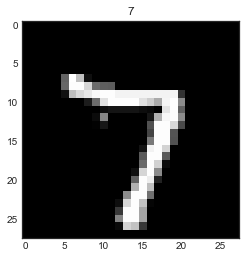

In [163]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()

### 각 Layer 설명

In [164]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d
- in_channels : 채널의 개수
- out_channels : 출력 채널의 개수
- kernel_size : 커널(필터) 사이즈
- 텐서플로우, 케라스와 다르게 레이어의 input 인자에도 값을 집어 넣어줘야함

In [165]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [166]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- weight 확인

In [174]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- weight는 detach()를 통해서 꺼내줘야 numpy() 변환이 가능

In [175]:
weight = weight.detach()

In [176]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

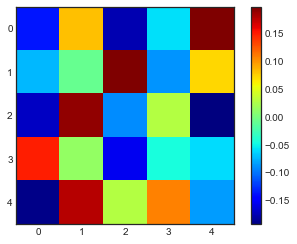

In [177]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [178]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [179]:
input_image = torch.unsqueeze(images[0],dim=0)

In [182]:
output_data = layer(input_image)

In [183]:
output = output_data.data

In [185]:
output_arr = output.numpy()
output.shape

torch.Size([1, 20, 24, 24])

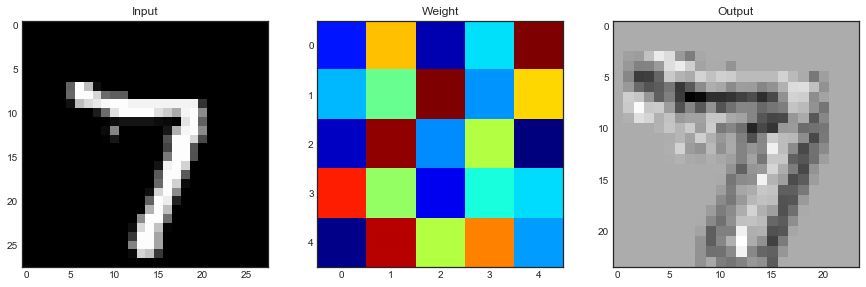

In [187]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('Input')
plt.imshow(image,'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:],'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:],'gray')
plt.show()

### Pooling
- F.max_pool2d
    - stride
    - kernel_size
- torch.nn.MaxPool2d 도 많이 사용

In [188]:
image.shape

(28, 28)

In [189]:
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 numpy()변환 가능

In [190]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

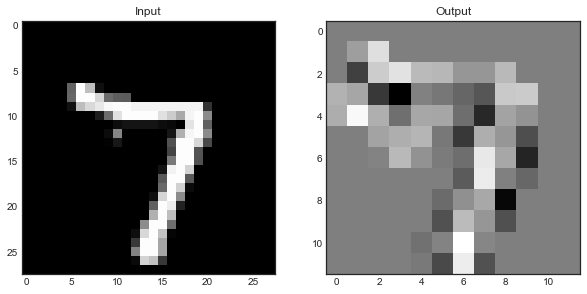

In [191]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('Input')
plt.imshow(image,'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:],'gray')

plt.show()

### Linear
- 1d만 가능 .view()를 통해 1D로 펼쳐줘야함

In [192]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [193]:
flatten = image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [194]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [195]:
lin

tensor([[ 0.1946,  0.3295, -0.1909, -0.4465,  0.2830, -0.5182,  0.3691,  0.0096,
         -0.7853, -0.3220]], grad_fn=<AddmmBackward>)

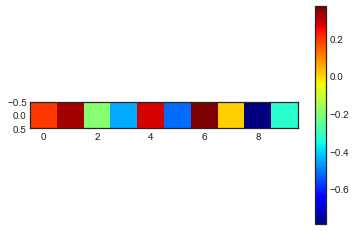

In [197]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()
plt.show()

### Softmax

In [200]:
with torch.no_grad():
    flatten = image.view(1,28*28)
    lin = nn.Linear(784,10)(flatten)
    softmax = F.softmax(lin,dim=1)

In [201]:
softmax

tensor([[0.1317, 0.0565, 0.0392, 0.1468, 0.0927, 0.0752, 0.1252, 0.0749, 0.1000,
         0.1578]])

In [202]:
np.sum(softmax.numpy())

1.0000001

### F.relu
- ReLU 함수를 적용하는 레이어
- nn.ReLU로도 사용 가능

In [203]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [207]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### Optimizer
- import torch.optim as optim
- model의 파라미터를 업데이트
- 예시)
- optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
- optimizer = optim.SGD(model.parameters(), lr=0.001)
- .zero_grad()로 초기화
- .step()으로 업데이트